<a href="https://colab.research.google.com/github/NouraBader-45/IT326-Obesity/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
df = pd.read_csv("Raw_dataset.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [137]:
#Five-number summary (min, Q1, median, Q3, max)
#This table shows the range, quartiles, and median of each numeric column.
#It helps identify possible outliers and understand the data distribution.
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


This table shows the minimum, maximum, median, and quartile values for each numeric column.  
It helps us see how the data is spread and if there are very high or very low values.  
We noticed some large differences between the max and min values, so we decided to apply normalization to make them closer in scale.

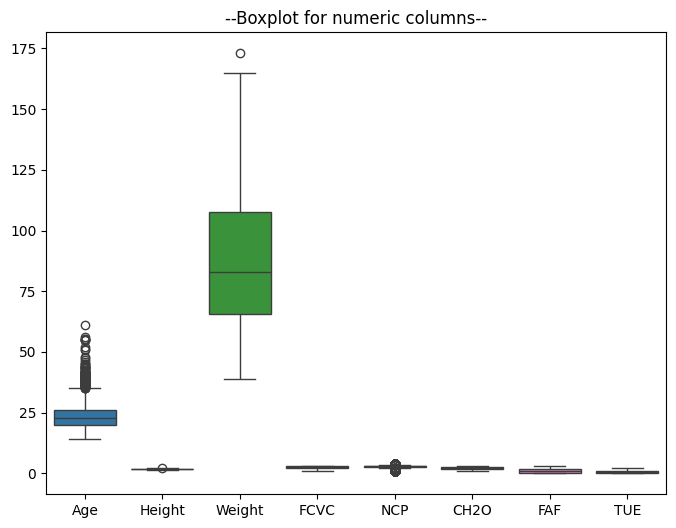

In [138]:
#Boxplot to check outliers
#Boxplots display the distribution and outliers of numeric data.
#Points outside the whiskers indicate potential outliers that may need cleaning.
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("--Boxplot for numeric columns--")
plt.show()


The boxplot shows the distribution of the numeric columns and highlights outliers (points outside the boxes).  
We can see that some columns like Weight and Age have a few outliers.  
This helped us realize that we need a preprocessing step to handle these outliers and make the data cleaner.

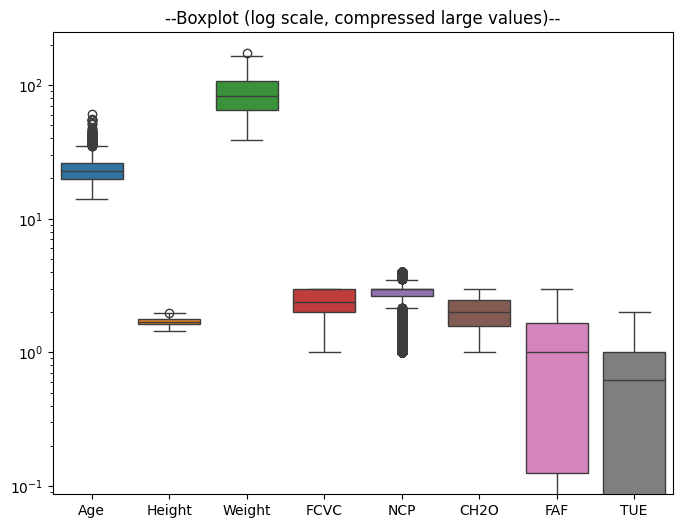

In [139]:
# Boxplot with log scale to make smaller-value columns more visible
# This version compresses large values (like Weight) so smaller attributes appear clearer.
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.yscale('log')
plt.title("--Boxplot (log scale, compressed large values)--")
plt.show()


Here we used a log scale to make small-value columns easier to see.  
This view helped us notice that the data is not on the same scale — some values are too large compared to others.  
That’s why we decided to apply normalization later to fix this difference.


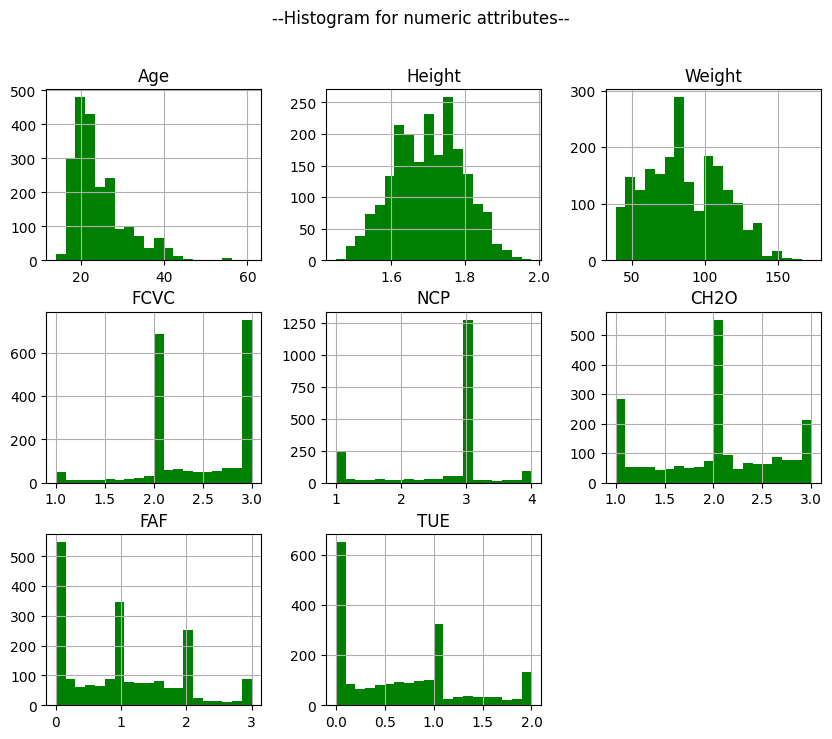

In [140]:
#Histogram for numeric data distribution
#Histograms show how data values are distributed.
#Skewed or uneven distributions suggest normalization or preprocessing is needed.
df.hist(figsize=(10,8), bins=20 , color='green')
plt.suptitle("--Histogram for numeric attributes--")
plt.show()

The histograms show how each numeric column’s values are distributed.  
Some of them are not evenly spread and are a bit skewed.  
This told us that our data could benefit from normalization and possibly discretization to make the ranges more consistent.

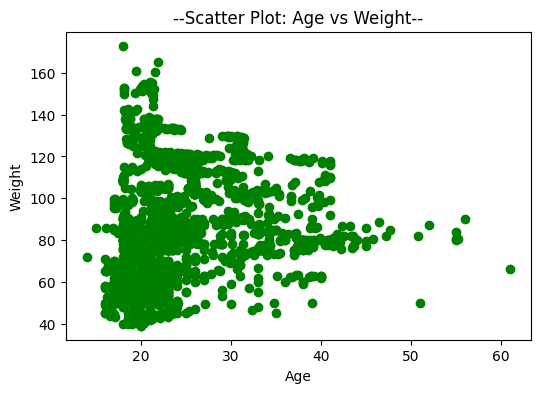

In [141]:
#Scatter plot between two columns (example: Age vs Weight)
#Scatter plots show the relationship between two numeric columns.
#Clusters, trends, or extreme points can indicate patterns or outliers.
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Weight'], color='green')
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("--Scatter Plot: Age vs Weight--")
plt.show()


This scatter plot shows the relationship between Age and Weight.  
We can see that weight increases slightly with age, but there are some points far away from the others.  
These extreme points confirmed that we need to handle outliers in preprocessing.

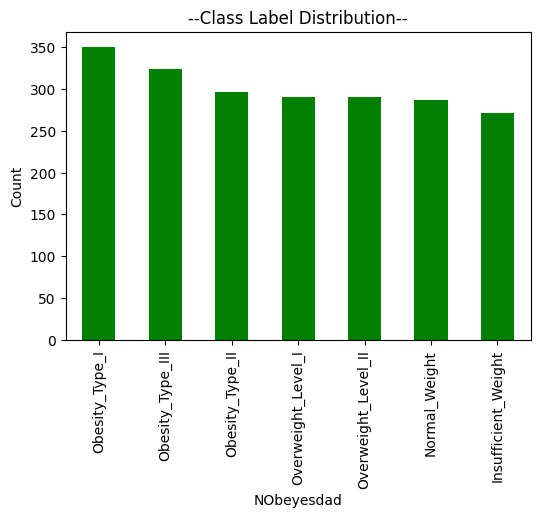

In [142]:
#Bar plot for class label distribution
#Bar plots show how many samples belong to each class.
#It helps understand class balance and whether preprocessing or resampling is needed.
plt.figure(figsize=(6,4))
df['NObeyesdad'].value_counts().plot(kind='bar' , color='green')
plt.title("--Class Label Distribution--")
plt.xlabel("NObeyesdad")
plt.ylabel("Count")
plt.show()


The bar chart shows the number of records in each obesity level.  
All classes have similar counts, so our dataset is balanced.  
This means we don’t need to apply balancing techniques, and we can focus on cleaning and transforming the features.

In [143]:
#Checking for missing values
df.isnull().sum()
#This shows how many missing values exist in each column.
#Columns with many missing values may need cleaning or imputation.

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


Why: We checked for missing values to ensure the dataset is complete and to avoid problems during preprocessing or training.

How: We used the isnull().sum() function to count missing values in each column.

Columns: All dataset columns were included in the check.

Result: All columns had zero missing values, so no imputation or deletion was required

In [144]:
# Normalization
df_norm = df.copy()
for col in df.select_dtypes(include=np.number).columns:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df_norm.head()
# Normalization rescales numeric values to 0-1.
# This helps models treat all features equally and prevents large values from dominating.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Why: We applied normalization to reduce the impact of large numerical values and ensure that all numeric features are on the same scale. This helps models perform better and prevents any single feature from dominating.

How: We used the Min–Max normalization formula to rescale numeric columns between 0 and 1.

Columns: Applied on all numeric columns (Age, Height, Weight, etc.) detected using df.select_dtypes(include=np.number).

Result: All numeric values were successfully scaled to the [0, 1] range, making the dataset more balanced for future modeling.

In [145]:
# Discretization
df_norm['Age_group'] = pd.cut(df_norm['Age'], bins=3, labels=["Young","Middle","Old"])
df_norm[['Age','Age_group']].head()
# Discretization converts continuous values into categories.
# It simplifies analysis and can improve pattern recognition.

,Age,Age_group
0,0.148936,Young
1,0.148936,Young
2,0.191489,Young
3,0.276596,Young
4,0.170213,Young


Why: We divided the Age column into categories to simplify analysis and improve comparison across different age ranges. Grouping continuous values helps models detect patterns more effectively.

How: We applied the pd.cut() function to divide the Age column into 3 equal-width bins labeled Young, Middle, and Old.

Columns: Applied on the Age column.

Result: The continuous Age values were successfully converted into categorical groups (Young, Middle, Old), making it easier to analyze and visualize age-related trends.

In [146]:
#Noise removal (handle outliers)
q1 = df_norm['Weight'].quantile(0.25)
q3 = df_norm['Weight'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_norm['Weight'] = np.where(df_norm['Weight'] > upper, df_norm['Weight'].median(), df_norm['Weight'])
df_norm['Weight'] = np.where(df_norm['Weight'] < lower, df_norm['Weight'].median(), df_norm['Weight'])
# This removes extreme values (outliers) in Income using the IQR method.
# It reduces noise and prevents them from affecting analysis or models.


Why: We removed extreme Weight values (outliers) to reduce noise and prevent them from negatively affecting analysis or model performance.

How: We used the IQR (Interquartile Range) method to detect outliers and replaced values beyond the upper and lower bounds with the column’s median.

Columns: Applied on the Weight column.

Result: Outliers were successfully handled, and the Weight data became cleaner and more consistent, improving data quality for later modeling.

In [147]:
#Save the new dataset
df.to_csv("Raw_dataset.csv", index=False)           # original dataset
df_norm.to_csv("Preprocessed_dataset.csv", index=False)  # after preprocessing
# We save the original and cleaned datasets separately.
# This keeps raw data intact and allows comparison after preprocessing.

In [152]:
# Show first 5 rows of raw dataset
print("Raw Dataset Snapshot:")
display(df.head())

Raw Dataset Snapshot:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [149]:
# Show first 5 rows of preprocessed dataset
print("Preprocessed Dataset Snapshot:")
display(df_norm.head())

Preprocessed Dataset Snapshot:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight,Young
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I,Young
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young


In [150]:
import os

# Create Dataset folder locally (temporary for Colab)
if not os.path.exists("Dataset"):
    os.makedirs("Dataset")

# Save the new preprocessed dataset
df_norm.to_csv("Dataset/Preprocessed_dataset.csv", index=False)

print("✅ File saved successfully in local Dataset folder.")


✅ File saved successfully in local Dataset folder.


In [151]:
df_norm.to_csv("Dataset/Preprocessed_dataset.csv", index=False)
